## Задание.
Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.rename(columns={'sepal length (cm)': 'длина чашелистика (см)', 'sepal width (cm)': 'ширина чашелистика (см)'
                     },
                     inplace=True)

data.head()

,длина чашелистика (см),ширина чашелистика (см),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Оставляем для анализа два признака - sepal_length (длина чашелистика) и sepal_width (ширина чашелистика) 

iris_1 = data[['длина чашелистика (см)', 'ширина чашелистика (см)']] 
iris_1.head()

,длина чашелистика (см),ширина чашелистика (см)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [9]:
iris_1_class = data_class
iris_1_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [11]:
len(y_test)

38

In [12]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis()

In [14]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1])

In [16]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [17]:
result

,0,1
0,2,2
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,2,1
8,2,2
9,2,2


In [18]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, lda.predict(X_test)) # коэффициент точности модели

0.9210526315789473

In [20]:
# коэффициенты дискриминатных линий
lda.coef_

array([[  7.36459199,  10.89290749, -19.27278498, -21.17352026],
       [ -1.2821679 ,  -3.82016186,   4.05340687,   2.358621  ],
       [ -5.69035068,  -6.7332978 ,  14.2805951 ,  17.52171286]])

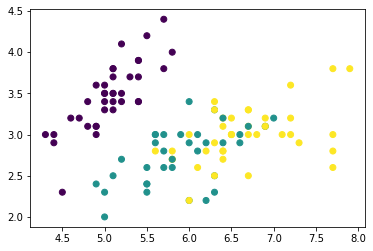

In [21]:
# визуализируем дискриминантную линию по 2 признакам (длина и ширина чашелистика)
plt.scatter(X_train['длина чашелистика (см)'], X_train['ширина чашелистика (см)'], c=y_train)
plt.show()

In [22]:
small_train = X_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['длина чашелистика (см)', 'ширина чашелистика (см)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]
small_test = small_test[['длина чашелистика (см)', 'ширина чашелистика (см)']]
sy_test = y_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]

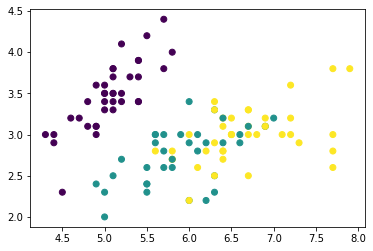

In [23]:
plt.scatter(small_train['длина чашелистика (см)'], small_train['ширина чашелистика (см)'], c=sy_train)
plt.show()

In [24]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [25]:
# посмотрим на центроиды
lda_small.means_

array([[5.06486486, 3.47567568],
       [5.90571429, 2.74571429],
       [6.655     , 2.995     ]])

<ipython-input-26-9a30949d41bf>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


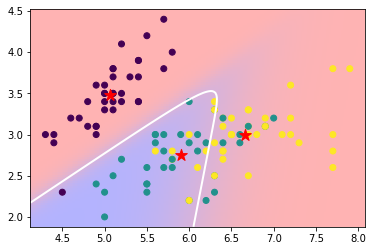

In [26]:
# сам scatter plot
plt.scatter(small_train['длина чашелистика (см)'], small_train['ширина чашелистика (см)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [27]:
lda_small.coef_

array([[-6.56228159,  8.1383848 ],
       [ 1.53787755, -3.69311736],
       [ 4.72446761, -4.29652825]])

In [28]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

0.7631578947368421

In [29]:
data[['длина чашелистика (см)', 'ширина чашелистика (см)']].corr()

,длина чашелистика (см),ширина чашелистика (см)
длина чашелистика (см),1.00000,-0.11757
ширина чашелистика (см),-0.11757,1.00000


In [30]:
#коэффициент показывает низкую корреляцию между признаками, что хорошо для модели

In [34]:
# Анализ на основе логистической регрессии

from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [37]:
lr.predict_proba(small_test)

array([[1.14952304e-01, 5.25885168e-01, 3.59162528e-01],
       [2.17313242e-03, 2.64985546e-01, 7.32841321e-01],
       [8.21720195e-01, 1.61862050e-01, 1.64177551e-02],
       [8.32927196e-01, 1.42960985e-01, 2.41118184e-02],
       [7.27896534e-01, 1.80019356e-01, 9.20841103e-02],
       [3.22395603e-02, 5.31230275e-01, 4.36530165e-01],
       [9.85443317e-01, 1.30377068e-02, 1.51897613e-03],
       [1.55958289e-02, 4.55257498e-01, 5.29146673e-01],
       [1.14623608e-02, 4.77095678e-01, 5.11441962e-01],
       [6.98100471e-03, 2.05931544e-01, 7.87087451e-01],
       [1.28980444e-01, 3.36587876e-01, 5.34431681e-01],
       [9.25849495e-01, 6.73935719e-02, 6.75693320e-03],
       [9.65212538e-01, 2.62370099e-02, 8.55045165e-03],
       [3.34436207e-02, 5.90353700e-01, 3.76202679e-01],
       [1.18819942e-01, 6.68310767e-01, 2.12869290e-01],
       [7.14783474e-01, 2.49431052e-01, 3.57854740e-02],
       [3.74573581e-01, 5.78827959e-01, 4.65984595e-02],
       [7.91959439e-03, 2.50272

In [38]:
lr.predict(small_test)

array([1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2])

In [39]:
accuracy_score(sy_test, lr.predict(small_test))

0.7894736842105263

In [40]:
lr.coef_

array([[-2.48409557,  2.09563978],
       [ 0.37519634, -1.45224694],
       [ 2.10889923, -0.64339284]])

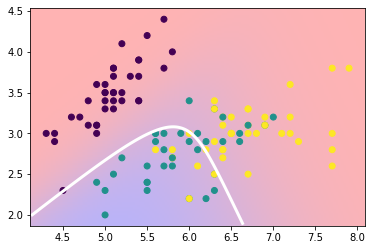

In [41]:
plt.scatter(small_train['длина чашелистика (см)'], small_train['ширина чашелистика (см)'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1., 2.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=3., colors='white')

plt.show()

In [42]:
from sklearn.cluster import KMeans #Кластеризация

In [45]:
iris_2 = iris_1.to_numpy()
iris_2

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

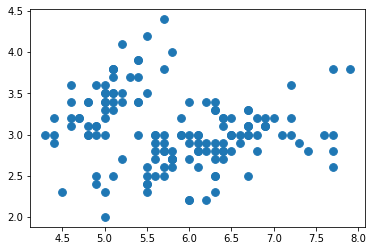

In [46]:
plt.scatter(iris_2[:, 0], iris_2[:, 1], cmap='autumn', s=60)

In [47]:
# указываем количество кластеров - 3
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(iris_2)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

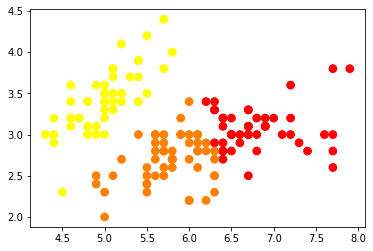

In [48]:
plt.scatter(iris_2[:, 0], iris_2[:, 1], cmap='autumn', c=clusters, s=60)

In [49]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_2)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

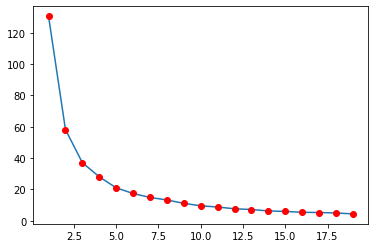

In [50]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [51]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

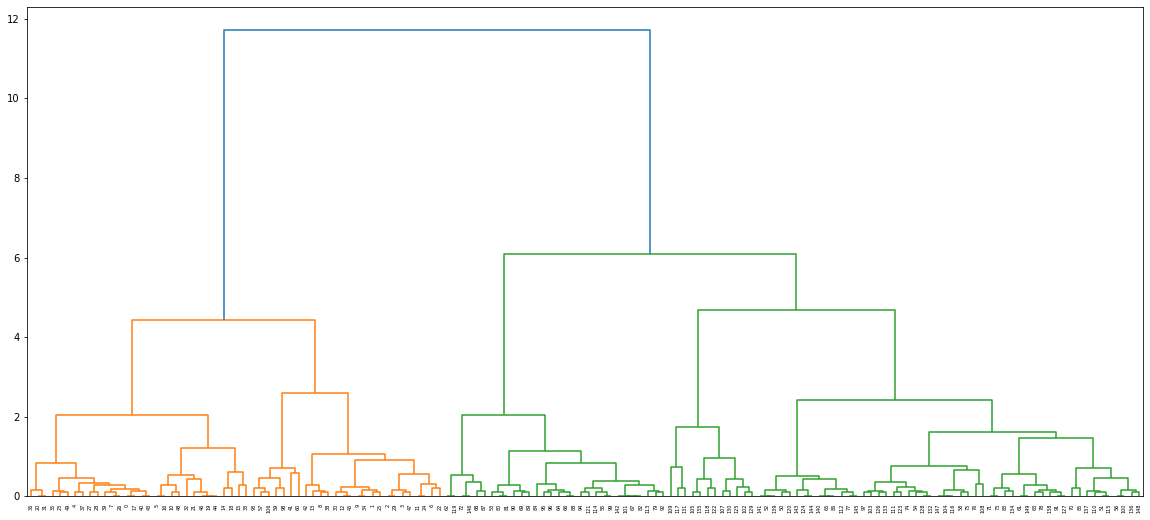

In [52]:
# строим дендрограмму
distance_mat = pdist(iris_2) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [53]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [54]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(iris_2)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0])

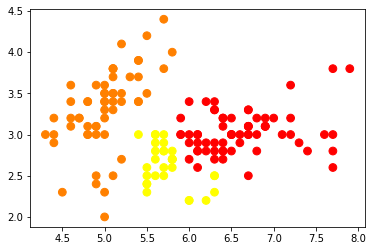

In [55]:
plt.scatter(iris_2[:, 0], iris_2[:, 1],cmap='autumn', c=clusters, s=60)